/projects/cc/se_users/carlsson_ksmq649/miniconda3/envs/aizynthmodels/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/projects/cc/se_users/carlsson_ksmq649/miniconda3/envs/aizynthmodels/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/projects/cc/se_users/carlsson_ksmq649/miniconda3/envs/aizynthmodels/lib/python3.10/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


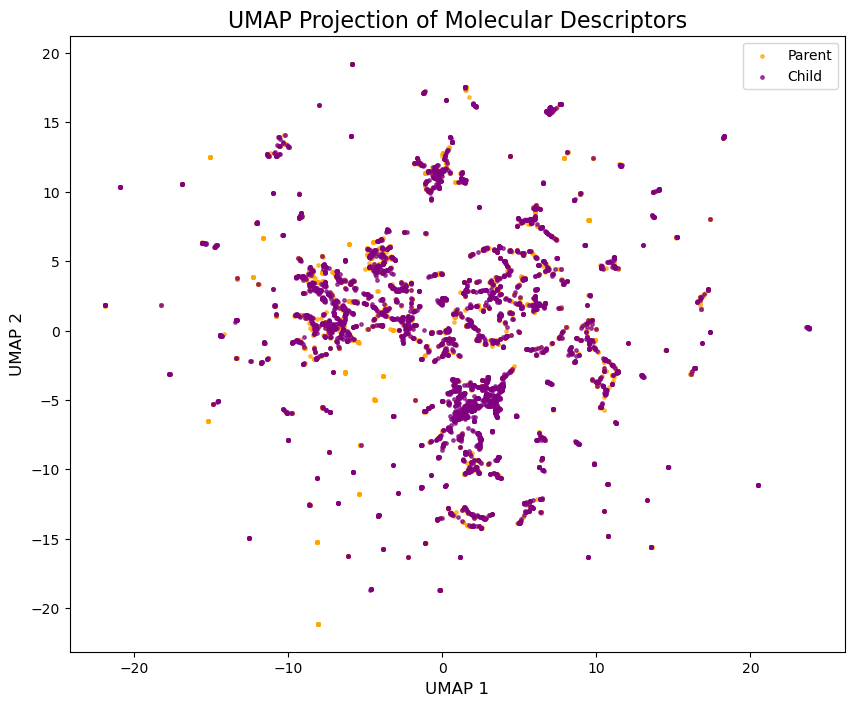

In [5]:
from rdkit import Chem
from rdkit.Chem import Descriptors, rdMolDescriptors, Lipinski, Crippen
import umap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def calculate_descriptors(smiles_list):
    data = []
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            # Handle cases where SMILES cannot be parsed.
            continue

        descriptors = {
            "Chiral": len(Chem.FindMolChiralCenters(mol, includeUnassigned=True)),
            "MolWt": round(Descriptors.MolWt(mol), 3),
            "HeavyAtoms": Lipinski.HeavyAtomCount(mol),
            "HAcceptors": Lipinski.NumHAcceptors(mol),
            "HDonors": Lipinski.NumHDonors(mol),
            "LogP": round(Crippen.MolLogP(mol), 3),
            "TPSA": round(Descriptors.TPSA(mol), 3),
            "AromaticAtoms": sum([1 for atom in mol.GetAtoms() if atom.GetIsAromatic()]),
            "FormalCharge": sum([atom.GetFormalCharge() for atom in mol.GetAtoms()]),
            "NumRings": rdMolDescriptors.CalcNumRings(mol),
            "FractionCSP3": round(Descriptors.FractionCSP3(mol), 3),
            "Halogens": Chem.Fragments.fr_halogen(mol),
            "MR": round(Crippen.MolMR(mol), 3),
            # Element-specific atom counts (e.g., N, O) can be added similarly
            "NumN": sum([1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 7]),
            "NumO": sum([1 for atom in mol.GetAtoms() if atom.GetAtomicNum() == 8]),
        }
        data.append(descriptors)
    return pd.DataFrame(data)

def visualize_with_umap(csv):
 
    df = pd.read_csv(csv)
    parent_smiles = df["parent_smiles"]
    child_smiles = df["child_smiles"]

    parent_descriptors = calculate_descriptors(parent_smiles)
    child_descriptors = calculate_descriptors(child_smiles)

    # Combine the descriptors for UMAP
    combined_data = pd.concat([parent_descriptors, child_descriptors], keys=['Parent', 'Child'])

    # Standardize the data for better UMAP performance
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(combined_data)

    # Initialize and fit UMAP
    reducer = umap.UMAP(random_state=42) #(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
    embedding = reducer.fit_transform(scaled_data)

    # Plot the UMAP
    plt.figure(figsize=(10, 8))
    plt.scatter(embedding[:len(parent_descriptors), 0], embedding[:len(parent_descriptors), 1], label='Parent', color='orange', s=6, alpha=0.7)
    plt.scatter(embedding[len(parent_descriptors):, 0], embedding[len(parent_descriptors):, 1], label='Child', color='purple', s=6, alpha=0.7)
    plt.title('UMAP Projection of Molecular Descriptors', fontsize=16)
    plt.xlabel('UMAP 1', fontsize=12)
    plt.ylabel('UMAP 2', fontsize=12)
    plt.legend()
    plt.show()

data_file = '/projects/cc/se_users/carlsson_ksmq649/MasterThesis/dataset/curated_data/combined_smiles_clean.csv'
visualize_with_umap(data_file)

In [ ]:
data_file = '/projects/cc/se_users/carlsson_ksmq649/MasterThesis/dataset/curated_data/combined_smiles_clean.csv'
visualize_with_umap(data_file)